# IMPORTING LIBRARIES AND DATASET

In [1]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
import string 
import numpy

In [2]:
import numpy as np
import tflearn
import tensorflow as tf
import random
import json
with open('intent-train.json') as jd:
    intents_1 = json.load(jd,strict=False)
with open('intent-test.json') as jd:
    intents_2 = json.load(jd,strict=False)
import speech_recognition as sr
r=sr.Recognizer()
import pyttsx3
engine = pyttsx3.init()

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


# DEFINING SPEECH

In [3]:
def bot_speaking(message):
    engine.say(message)
    engine.runAndWait()
    if engine._inLoop:
        engine.endLoop()

In [4]:
nltk.download('punkt')
#Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences,
#by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
#It must be trained on a large collection of plaintext in the target language before it can be used.
#Create words, classes and documents
words = []
classes = []
documents = []
ignore_words = ['?','!']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# loop through each sentence in our intents patterns
for intent in intents_1['intents']:
    for pattern in intent['patterns']:
      
        # tokenize each word in the sentence
        
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus        # add to our classes list
        if intent['tag'] not in classes:

            documents.append((w, intent['tag']))
            classes.append(intent['tag'])


In [6]:
# stem and lower each word and remove duplicates
words = sorted(list(set([stemmer.stem(w.lower()) for w in words if w not in ignore_words])))

# remove duplicates
classes = sorted(list(set(classes)))
print(words)

['&', "'s", 'a', 'about', 'act', 'admit', 'ae', 'anyon', 'ar', 'art', 'at', 'attend', 'avail', 'branch', 'bye', 'can', 'check', 'choreo', 'civil', 'club', 'colleg', 'company', 'cre', 'cresendo', 'cse', 'dant', 'day', 'depart', 'dept', 'detail', 'diff', 'do', 'doe', 'dram', 'dramatrix', 'ec', 'ee', 'ei', 'elect', 'engl', 'extra-circular', 'facul', 'feedback', 'film', 'food', 'from', 'get', 'giv', 'good', 'goodby', 'got', 'h', 'hav', 'head', 'hello', 'help', 'hey', 'hi', 'highest', 'hod', 'hostel', 'how', 'i', 'in', 'inform', 'into', 'is', 'it', 'kind', 'know', 'lat', 'lit', 'livewir', 'lot', 'many', 'mark', 'me', 'mech', 'memb', 'mid', 'mus', 'my', 'nam', 'of', 'op', 'pack', 'pattern', 'peopl', 'photograph', 'plac', 'prep', 'princip', 'process', 'provid', 's', 'sahitivanam', 'scintil', 'see', 'select', 'serv', 'short', 'soc', 'start', 'stent', 'sum', 'technolog', 'tel', 'telugu', 'test', 'thank', 'that', 'the', 'ther', 'to', 'typ', 'visit', 'vjteatro', 'vnr', 'vnrvjiet', 'voic', 'volunt

In [7]:
#Getting to know the documents,classes and stemmed words
print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)


35 documents
35 classes [' EEE Department', 'AE Department', 'CIVIL Department', 'CSE Department', 'ECE Department', 'EIE Department', 'H&S Department', 'Hostel details', 'IT Department', 'IT HOD', 'MECHANICAL Department', 'VNR', 'admissions', 'arts club', 'clubs', 'dance club', 'department', 'drama club', 'eduprime', 'english club', 'food', 'goodbye', 'greeting', 'literary clubs', 'music club', 'photography club', 'placement companies', 'placement package', 'placement preparation', 'placement summary', 'shortfilm club', 'social club', 'staff details', 'telugu club', 'thanks']
127 unique stemmed words ['&', "'s", 'a', 'about', 'act', 'admit', 'ae', 'anyon', 'ar', 'art', 'at', 'attend', 'avail', 'branch', 'bye', 'can', 'check', 'choreo', 'civil', 'club', 'colleg', 'company', 'cre', 'cresendo', 'cse', 'dant', 'day', 'depart', 'dept', 'detail', 'diff', 'do', 'doe', 'dram', 'dramatrix', 'ec', 'ee', 'ei', 'elect', 'engl', 'extra-circular', 'facul', 'feedback', 'film', 'food', 'from', 'get',

In [8]:
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)
print(training)

[]


In [9]:
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    print(bag)
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [10]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
print(training)

[[list([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]
 [list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<ipython-input-10-de6d08045be1>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)


In [11]:
words_1 = []
classes_1 = []
documents_1 = []
ignore_words = ['?','!']

In [12]:
# loop through each sentence in our intents patterns
for intent in intents_2['intents']:
    for pattern in intent['patterns']:
      
        # tokenize each word in the sentence
        
        w1 = nltk.word_tokenize(pattern)
        # add to our words list
        words_1.extend(w1)
        # add to documents in our corpus        # add to our classes list
        if intent['tag'] not in classes_1:

            documents_1.append((w1, intent['tag']))
            classes_1.append(intent['tag'])

In [13]:
# stem and lower each word and remove duplicates
words_1 = sorted(list(set([stemmer.stem(w1.lower()) for w1 in words_1 if w1 not in ignore_words])))

# remove duplicates
classes_1 = sorted(list(set(classes_1)))
print(words_1)

['&', "'s", 'a', 'about', 'admit', 'ae', 'anyon', 'ar', 'art', 'at', 'attend', 'avail', 'bye', 'can', 'check', 'civil', 'club', 'colleg', 'company', 'cse', 'dant', 'depart', 'dept', 'detail', 'diff', 'dram', 'ec', 'ee', 'ei', 'elect', 'facul', 'feedback', 'film', 'food', 'from', 'get', 'giv', 'goodby', 'got', 'h', 'hav', 'head', 'hello', 'help', 'hi', 'highest', 'hod', 'hostel', 'how', 'i', 'in', 'inform', 'is', 'it', 'know', 'lat', 'lit', 'lot', 'many', 'mark', 'me', 'mech', 'memb', 'mid', 'mus', 'my', 'of', 'op', 'pack', 'peopl', 'photograph', 'plac', 'prep', 'princip', 'process', 'provid', 's', 'sahitivanam', 'see', 'select', 'serv', 'short', 'soc', 'start', 'stent', 'sum', 'thank', 'that', 'the', 'ther', 'to', 'typ', 'visit', 'vnr', 'vnrvjiet', 'what', 'wher', 'which', 'who', 'you']


In [14]:
#Getting to know the documents,classes and stemmed words
print (len(documents_1), "documents")
print (len(classes_1), "classes", classes)
print (len(words_1), "unique stemmed words", words)


35 documents
35 classes [' EEE Department', 'AE Department', 'CIVIL Department', 'CSE Department', 'ECE Department', 'EIE Department', 'H&S Department', 'Hostel details', 'IT Department', 'IT HOD', 'MECHANICAL Department', 'VNR', 'admissions', 'arts club', 'clubs', 'dance club', 'department', 'drama club', 'eduprime', 'english club', 'food', 'goodbye', 'greeting', 'literary clubs', 'music club', 'photography club', 'placement companies', 'placement package', 'placement preparation', 'placement summary', 'shortfilm club', 'social club', 'staff details', 'telugu club', 'thanks']
100 unique stemmed words ['&', "'s", 'a', 'about', 'act', 'admit', 'ae', 'anyon', 'ar', 'art', 'at', 'attend', 'avail', 'branch', 'bye', 'can', 'check', 'choreo', 'civil', 'club', 'colleg', 'company', 'cre', 'cresendo', 'cse', 'dant', 'day', 'depart', 'dept', 'detail', 'diff', 'do', 'doe', 'dram', 'dramatrix', 'ec', 'ee', 'ei', 'elect', 'engl', 'extra-circular', 'facul', 'feedback', 'film', 'food', 'from', 'get',

In [15]:
testing = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes_1)
print(testing)

[]


In [16]:
# training set, bag of words for each sentence
import numpy as np
for doc in documents_1:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    print(bag)
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes_1.index(doc[1])] = 1
    testing.append([bag, output_row])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [17]:
# shuffle our features and turn into np.array
random.shuffle(testing)
testing = np.array(testing)
print(testing)

[[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])]
 [list([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

  list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])]]


<ipython-input-17-6f90835d0911>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  testing = np.array(testing)


In [18]:
# create train lists
from sklearn.model_selection import train_test_split 
train_x = list(training[:,0])
train_y = list(training[:,1])
test_x  = list(testing[:,0])
test_y  = list(testing[:,1])

In [19]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
# Build neural network
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net,12)
net = tflearn.fully_connected(net,12)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)

# Define model and setup tensorboard
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs') 
# Start training (apply batch gradient descent algorithm)
history=model.fit(train_x, train_y, n_epoch=700, batch_size=8, show_metric=True)
model.save('model.tflearn')

Training Step: 3369  | total loss: 0.46290 | time: 0.008s
| Adam | epoch: 674 | loss: 0.46290 - acc: 0.9562 -- iter: 32/35
Training Step: 3370  | total loss: 0.47534 | time: 0.016s
| Adam | epoch: 674 | loss: 0.47534 - acc: 0.9481 -- iter: 35/35
--


In [20]:
import pickle
pickle.dump({'words':words, 'classes':classes,'train_x':train_x,'train_y':train_y},open( "training_data", "wb" ))

# restore all of our data structures
import pickle
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


In [21]:
# import our chat-bot intents file
import json
with open('intent-train.json') as jd:
    intents = json.load(jd)
    
# load our saved model
model.load('./model.tflearn')

def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

INFO:tensorflow:Restoring parameters from C:\Users\Dell\Desktop\major project\model.tflearn


In [22]:
def cchat():
    print("BOT: I am  your Personal Digital Assistant. What can I do for you!")
    while True:
        inp=input("YOU : ")
        if inp.lower()=="quit" or inp==None:
            break
        if inp=='quit':
            break
        results = model.predict([bow(inp, words)])[0]
        results_index=numpy.argmax(results)
        tag=classes[results_index]
        if(results[results_index]>0.65):
            #print(results)
            for tg in intents['intents']:
                if tg['tag']==tag:
                    response=tg['responses']
            ms=random.choice(response)

            print("BOT : " +ms)
            bot_speaking(ms)
        else:
            print("BOT :  I did not understand you! Try again")
            
            bot_speaking("I did not understand you! Try again")
cchat()  

BOT: I am  your Personal Digital Assistant. What can I do for you!
YOU : Tell me about vnrvjiet
BOT : Vallurupalli Nageswara Rao Vignana Jyothi Institute of Engineering and Technology (VNRVJIET) is an engineering college in Hyderabad, India recognized by All India Council for Technical Education(AICTE) and affiliated to the Jawaharlal Nehru Technological University, Hyderabad.
YOU : quit


In [ ]:
from tkinter import *

BG_GRAY = "#ABB2B9"
BG_COLOR = "#17202A"
TEXT_COLOR = "#EAECEE"

FONT = "Helvetica 14"
FONT_BOLD = "Helvetica 13 bold"
bot_name ="VNR-BOT"
def get_response(msg):
    inp=msg
  #  print("BOT: I am  your Personal Digital Assistant. What can I do for you!")
    while True:
       # inp=input("YOU : ")
        if inp.lower()=="quit" or inp==None:
            break
        if inp=='quit':
            break
        results = model.predict([bow(inp, words)])[0]
        results_index=numpy.argmax(results)
        tag=classes[results_index]
        if(results[results_index]>0.65):
            
            for tg in intents['intents']:
                if tg['tag']==tag:
                    response=tg['responses']
                    ms=random.choice(response)
                    bot_speaking(ms)
            return ms
           # print("BOT : " +ms)
            #bot_speaking(ms)
        else:
            return " I did not understand you! Try again"
           #bot_speaking("I did not understand you! Try again")

class ChatApplication:
    
    def __init__(self):
        self.window = Tk()
        self._setup_main_window()
        
    def run(self):
        self.window.mainloop()
        
    def _setup_main_window(self):
        self.window.title("Chat")
        #self.window.resizable(width=False, height=False)
        self.window.configure(width=470, height=550, bg=BG_COLOR)
        
        # head label
        head_label = Label(self.window, bg=BG_COLOR, fg=TEXT_COLOR,
                           text="WELCOME TO VNRVJIET CHAT-BOT", font=FONT_BOLD, pady=10)
        head_label.place(relwidth=1)
        
        # tiny divider
        line = Label(self.window, width=450, bg=BG_GRAY)
        line.place(relwidth=1, rely=0.07, relheight=0.012)
        
        # text widget
        self.text_widget = Text(self.window, width=20, height=2, bg=BG_COLOR, fg=TEXT_COLOR,
                                font=FONT, padx=5, pady=5)
        self.text_widget.place(relheight=0.745, relwidth=1, rely=0.08)
        self.text_widget.configure(cursor="arrow", state=DISABLED)
        
        # scroll bar
        scrollbar = Scrollbar(self.text_widget)
        scrollbar.place(relheight=1, relx=0.974)
        scrollbar.configure(command=self.text_widget.yview)
        
        # bottom label
        bottom_label = Label(self.window, bg=BG_GRAY, height=80)
        bottom_label.place(relwidth=1, rely=0.825)
        
        # message entry box
        self.msg_entry = Entry(bottom_label, bg="#2C3E50", fg=TEXT_COLOR, font=FONT)
        self.msg_entry.place(relwidth=0.74, relheight=0.06, rely=0.008, relx=0.011)
        self.msg_entry.focus()
        self.msg_entry.bind("<Return>", self._on_enter_pressed)
        
        # send button
        send_button = Button(bottom_label, text="Send", font=FONT_BOLD, width=20, bg=BG_GRAY, command=lambda: self._on_enter_pressed(None))
        send_button.place(relx=0.77, rely=0.008, relheight=0.06, relwidth=0.22)
     
    def _on_enter_pressed(self, event):
        msg = self.msg_entry.get()
        self._insert_message(msg, "You")
        
    def _insert_message(self, msg, sender):
        if not msg:
            return
        
        self.msg_entry.delete(0, END)
        msg1 = f"{sender}: {msg}\n\n"
        self.text_widget.configure(state=NORMAL)
        self.text_widget.insert(END, msg1)
        self.text_widget.configure(state=DISABLED)
        
        msg2 = f"{bot_name}: {get_response(msg)}\n\n"
        self.text_widget.configure(state=NORMAL)
        self.text_widget.insert(END, msg2)
        self.text_widget.configure(state=DISABLED)
        
        self.text_widget.see(END)
             
        
if __name__ == "__main__":
    app = ChatApplication()
    app.run()

# TESTING

# We observe accuracy and loss for each epoch

In [73]:
import matplotlib.pyplot as plt
x=model.predict(test_x)

In [74]:
y=test_y

<function matplotlib.pyplot.show(close=None, block=None)>

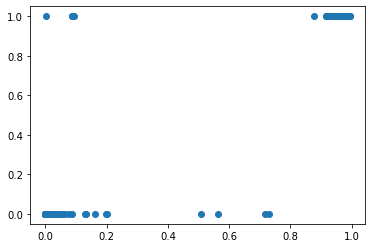

In [75]:
plt.scatter(x,y)
plt.show

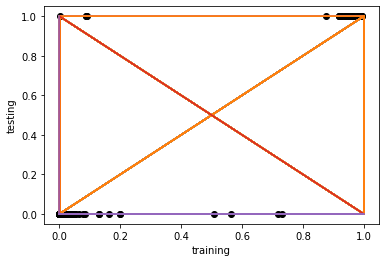

In [90]:
plt.plot(train_x, test_x, label='Data')
plt.scatter(x, y, color='k', label='Predictions')
plt.xlabel('training')
plt.ylabel('testing')
plt.show()